# get country population from original dataset (csv file)
# data visualization of variables

In [3]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#get drug data from original data source
filepath = 'https://raw.githubusercontent.com/nikhsakhamuri/PYT303_PharmCost/main/PharmaceuticalCostsbyCountry.csv'
drugData = pd.read_csv(filepath)

In [5]:
#get population from original data source
filepath = 'https://raw.githubusercontent.com/nikhsakhamuri/PYT303_PharmCost/main/populationdata.csv'
populationData = pd.read_csv(filepath)

In [6]:
#Calculate the Population in mill
#mergedData['Pop in mill (old)'] = mergedData.apply(lambda x: x['TOTAL_SPEND'] / x['USD_CAP'], axis=1)

In [7]:
#get population from original data set
drugData['Year']=drugData['TIME']
drugData['Country Code']=drugData['LOCATION']
mergedData = drugData.merge(populationData,on=["Country Code","Year"])

In [8]:
#get population in mill
mergedData['Pop in mill']=mergedData.apply(lambda x: (x['Value'] / 1000000 ), axis=1)

In [9]:
#Calculate the Total Healthcare Expenditure in mill USD 
mergedData['Total HC Exp in mill USD'] = mergedData.apply(lambda x: (x['TOTAL_SPEND'] / (x['PC_HEALTHXP']/100)), axis=1)

In [10]:
#Calculate the GDP (PPP) in mill USD 
mergedData['GDP (PPP) in mill USD'] = mergedData.apply(lambda x: x['TOTAL_SPEND'] / (x['PC_GDP']/100), axis=1)

In [11]:
#Calculate the GDP (PPP) per Capita in USD 
mergedData['GDP (PPP) per Capita in USD'] = mergedData.apply(lambda x: x['GDP (PPP) in mill USD'] / x['Pop in mill'], axis=1)

In [12]:
#validate raw population
mergedData['USD_CAP (New)'] = mergedData.apply(lambda x: (x['TOTAL_SPEND']) / x['Pop in mill'], axis=1)

In [13]:
mergedData.head(10)

,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Year,Country Code,Country Name,Value,Pop in mill,Total HC Exp in mill USD,GDP (PPP) in mill USD,GDP (PPP) per Capita in USD,USD_CAP (New)
0,AUS,1971,15.992,0.727,35.720,NaN,462.11,1971,AUS,Australia,12937000,12.937,2889.632316,63563.961486,4913.346331,35.720028
1,AUS,1972,15.091,0.686,36.056,NaN,475.11,1972,AUS,Australia,13177000,13.177,3148.300311,69258.017493,5255.977650,36.056007
2,AUS,1973,15.117,0.681,39.871,NaN,533.47,1973,AUS,Australia,13380000,13.380,3528.940927,78336.270191,5854.728714,39.870703
3,AUS,1974,14.771,0.755,47.559,NaN,652.65,1974,AUS,Australia,13723000,13.723,4418.455081,86443.708609,6299.184479,47.558843
4,AUS,1975,11.849,0.682,47.561,NaN,660.76,1975,AUS,Australia,13893000,13.893,5576.504346,96885.630499,6973.701180,47.560642
5,AUS,1976,10.920,0.630,46.908,NaN,658.26,1976,AUS,Australia,14033000,14.033,6028.021978,104485.714286,7445.714693,46.908003
6,AUS,1977,10.087,0.613,47.649,NaN,676.23,1977,AUS,Australia,14192000,14.192,6703.975414,110314.845024,7773.030230,47.648675
7,AUS,1978,9.958,0.591,50.799,NaN,729.37,1978,AUS,Australia,14358000,14.358,7324.462744,123412.859560,8595.407408,50.798858
8,AUS,1979,8.981,0.523,49.766,NaN,722.30,1979,AUS,Australia,14514000,14.514,8042.534239,138107.074570,9515.438512,49.765743
9,AUS,1980,9.263,0.540,56.972,NaN,837.03,1980,AUS,Australia,14692000,14.692,9036.273346,155005.555556,10550.337296,56.971821


Text(0, 0.5, 'Mil USD')

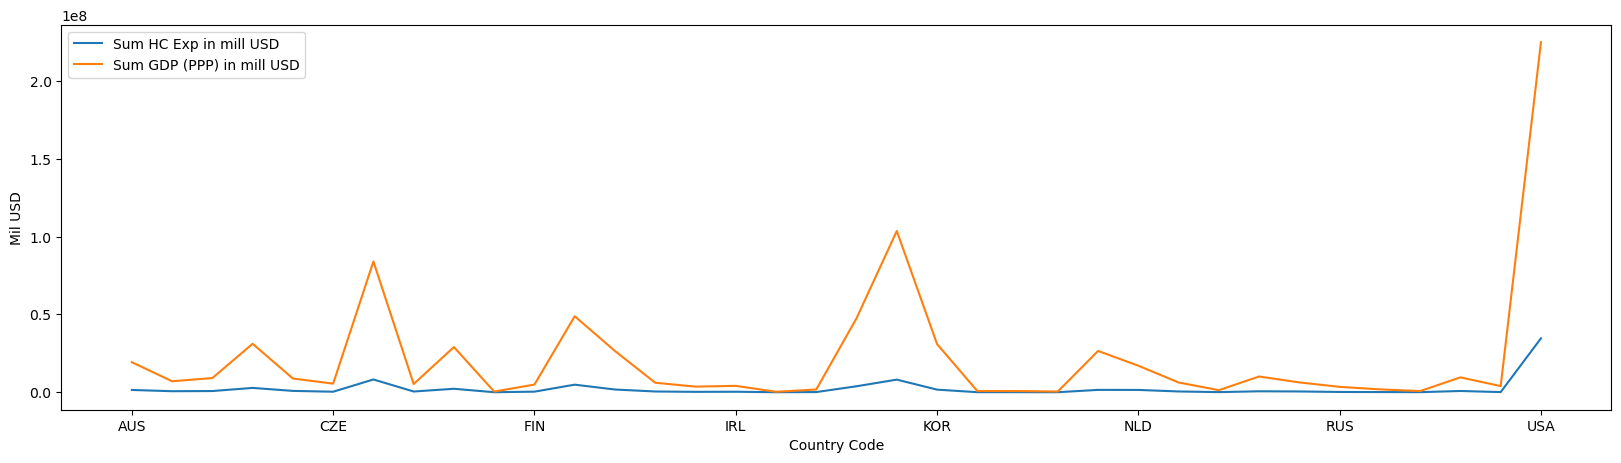

In [14]:
fig, axs = plt.subplots(1, 1, figsize=(20,5))
bardata=mergedData.groupby('Country Code')\
    .agg({'Total HC Exp in mill USD': 'sum','GDP (PPP) in mill USD': 'sum'})\
    .sort_values('Country Code')\
    .rename(columns={'Total HC Exp in mill USD':'Sum HC Exp in mill USD','GDP (PPP) in mill USD':'Sum GDP (PPP) in mill USD'})
bardata[['Sum HC Exp in mill USD','Sum GDP (PPP) in mill USD']].plot(ax=axs)
axs.set_ylabel('Mil USD')

In [15]:
mergedData.loc[mergedData['Country Code'] == 'USA',:]


,LOCATION,TIME,PC_HEALTHXP,PC_GDP,USD_CAP,FLAG_CODES,TOTAL_SPEND,Year,Country Code,Country Name,Value,Pop in mill,Total HC Exp in mill USD,GDP (PPP) in mill USD,GDP (PPP) per Capita in USD,USD_CAP (New)
956,USA,2000,11.365,1.421,518.109,NaN,146190.88,2000,USA,United States,282162411,282.162411,1.286325e+06,1.028789e+07,36460.871477,518.108984
957,USA,2001,11.729,1.545,575.975,NaN,164134.99,2001,USA,United States,284968955,284.968955,1.399395e+06,1.062362e+07,37279.934399,575.974986
958,USA,2002,12.075,1.686,643.351,NaN,185043.96,2002,USA,United States,287625193,287.625193,1.532455e+06,1.097532e+07,38158.423221,643.351016
959,USA,2003,12.327,1.782,707.226,NaN,205171.87,2003,USA,United States,290107933,290.107933,1.664410e+06,1.151357e+07,39687.204802,707.225990
960,USA,2004,12.505,1.818,762.271,NaN,223196.99,2004,USA,United States,292805298,292.805298,1.784862e+06,1.227706e+07,41929.098415,762.271009
961,USA,2005,12.471,1.814,803.701,NaN,237506.99,2005,USA,United States,295516599,295.516599,1.904474e+06,1.309300e+07,44305.458274,803.701013
962,USA,2006,12.725,1.866,866.302,NaN,258487.11,2006,USA,United States,298379912,298.379912,2.031333e+06,1.385247e+07,46425.615479,866.301985
963,USA,2007,12.641,1.884,905.301,NaN,272704.91,2007,USA,United States,301231207,301.231207,2.157305e+06,1.447478e+07,48052.069548,905.300990
964,USA,2008,12.399,1.896,917.815,NaN,279102.00,2008,USA,United States,304093966,304.093966,2.251004e+06,1.472057e+07,48407.963545,917.814989
965,USA,2009,12.331,2.015,946.894,NaN,290480.12,2009,USA,United States,306771529,306.771529,2.355690e+06,1.441589e+07,46992.258035,946.893999
